# The Sinking of RMS Titanic


   <img src=Stöwer_Titanic.jpg >
   

- No doubt was a tragedy (word titanic reflects tragedy) 
- the pictures of men and women, exploding in fear, mixed feelings of fear, hope, love, anger, sadness and self blaming
- it reflects mixed traits the arrogance, carlessness, courage, selfessness, and selfeshness
- what made it more tragic is the fact that the boats were not enough to carry all the pessengers, under the claim that the titanic is unsinkable, and that a ship that big will not sink before another ship comes for rescue
- what made it even worse is that the security guys allowed some boats to going half full..
- in such difficult situations it's really hard to set rules or put strict criteria for the pessengers to be saved
- the Captain of the titanic ordered that women and children be of higher priority, but were women and children given priority (or did the crew tend to give priority to women and children)? 
- of course they were not all women and children who were saved, many men were also saved, and many women couldn't make it
- but how did the crew choose, what was the general criteria? 
- Was a priority given to men of first and/or second class? or was the priority given to men whose children had no one else in the world to live with them?

we will try to answer the above questions through the [Titanic Data](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv), containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the [Kaggle website](https://www.kaggle.com/c/titanic/data), where the data was obtained.

In [50]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


In [29]:
# source of this code: https://stackoverflow.com/users/4244561/harshil
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Data Import and wrangling
As a first step we will import our data and get it ready for exploratory data analysis

### Data Import
Importing data, and displaying first few lines

In [30]:
titanic_data=pd.read_csv("titanic-data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Some notes about the data:

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

### Data wrangling 
Let's start by showing discriptive statistics for the dataframe, this will show us if there is any surprising data, or any data that needs to be fixed

In [31]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


first thing we noticed, is that the Age column seems to have abnormality (count is less than the other column). otherwise there doesn's seem to be extreme data points (all within expected range) .. also we need to parse the pessenger ID to be a string rather than an intiger, we don't need to make any arithmatic operations on it.we would also create a numerical representation of "Sex" in order to have an overview wether the majority are males or females (to have some descriptive statistics). Let's first modify the data then we can look into the Age matter

now let's convert the pessenger IDs to strings. and add the Sex_numeric column



In [32]:
titanic_data['Passenger_Id']=titanic_data['PassengerId'].apply(str)
del titanic_data['PassengerId']
titanic_data['Sex_numeric']=(titanic_data['Sex']=='female').apply(int)

Now we will investigate the missing records for age

In [33]:
titanic_data[titanic_data['Age'].isnull()==True].head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Id,Sex_numeric
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,6,0
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,18,0


It seems that some pessenger age information is actually missing (NaN value). We will leave it this way for the original file, and be careful while drawing conclusions that some pessengers have missing data. for this we will create a new file containing only known age info, and we will use it whenever age is a factor

In [34]:
titanic_data_full_Age=titanic_data[titanic_data['Age'].isnull()==False]

In [35]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_numeric
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Now the pessenger_ID column is appearing in the descriptive statistics, while the Sex_numeric column is appearing. it's obvious that majority of passengers were males The data is ready for exploration

### Exploratory Data Analysis
We will try to answer the following refined questions given the data:

- Were women and children more likely to survive the titanic?
- Was cabin class a factor in survival? for men and women?
- were first class men given higher chance of survival compared to 3rd class women and children?

so survival rate (% of pessengers survived) is the **independent variable**, while we can say gender, age, cabin Class are the dependent variables. 

survival rate can be defined as sum of surviving perssengers divided by total number of pessengers for each category (agender, age, class)

we can also check if fair has any correlation with chance of survival, despite it is not so likely

Let's plot some charts

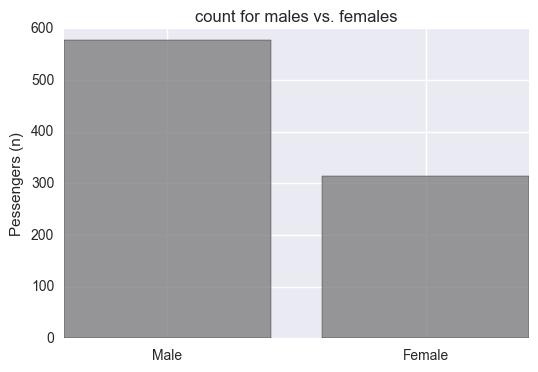

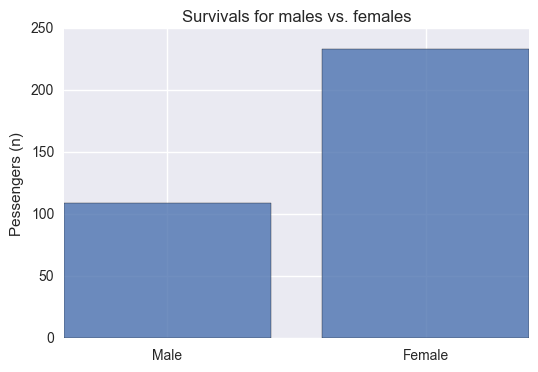

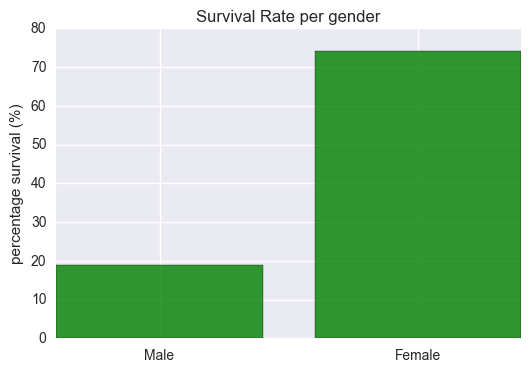

In [36]:
#bar plots for males count vs females
xval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Sex_numeric']
yval=titanic_data.groupby('Sex_numeric',as_index=False).count()['Survived']
lables=["Male","Female"]
plt.bar(xval-0.4, yval, alpha=0.8, color='grey')
plt.xticks(xval, lables)
plt.title("count for males vs. females")
plt.ylabel("Pessengers (n)")
plt.show()

#bar plots for males survived vs females
xval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Sex_numeric']
yval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Survived']
lables=["Male","Female"]
plt.bar(xval-0.4, yval, alpha=0.8)
plt.xticks(xval, lables)
plt.title("Survivals for males vs. females")
plt.ylabel("Pessengers (n)")
plt.show()

#bar plots for females survival percentage vs males
xval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Sex_numeric']
yval=100*titanic_data.groupby('Sex_numeric',as_index=False).sum()['Survived']/titanic_data.groupby('Sex_numeric',as_index=False).count()['Survived']
lables=["Male","Female"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("Survival Rate per gender")
plt.ylabel("percentage survival (%)")
plt.show()


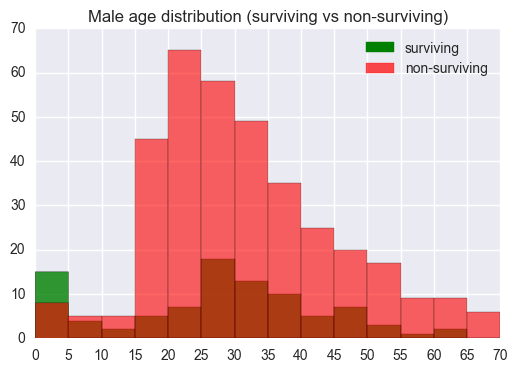

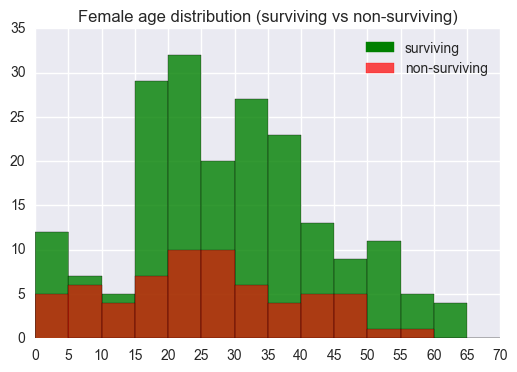

In [37]:
# Survival vs age
# Let's represent it by Histogram for males and females separately.. we will start by males
# let's also normalize it by the count of males for each bins
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color='green'),Rectangle((0,0),1,1,color='red', alpha=0.7)]
legend_labels=['surviving','non-surviving']
bin_values = [n*5 for n in range(15)]

#male distribution
surviving_males_ages=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==0) & (titanic_data_full_Age['Survived']==1)]['Age']
non_surviving_males_ages=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==0) & (titanic_data_full_Age['Survived']==0)]['Age']
plt.hist(surviving_males_ages, alpha=0.8,color='green',bins=bin_values)
plt.hist(non_surviving_males_ages, alpha=0.6, color='red',bins=bin_values)
plt.xticks(bin_values)
plt.title("Male age distribution (surviving vs non-surviving)")
plt.legend(handles, legend_labels,loc='upper right')
plt.show()

#female distribution
surviving_female_ages=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==1) & (titanic_data_full_Age['Survived']==1)]['Age']
non_surviving_female_ages=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==1) &(titanic_data_full_Age['Survived']==0)]['Age']
plt.hist(surviving_female_ages, alpha=0.8,color='green',bins=bin_values)
plt.hist(non_surviving_female_ages, alpha=0.6, color='red',bins=bin_values)
plt.xticks(bin_values)
plt.legend(handles, legend_labels,loc='upper right')
plt.title("Female age distribution (surviving vs non-surviving)")
plt.show()

It seems Women survival rates are much higher than men. It also seems as seen in histograms that, especially for males, the age seems to be an important variable, which affected survival rate.. younger children seem to have higher survival rate.

Now let's look at the class, was it an important variable too?

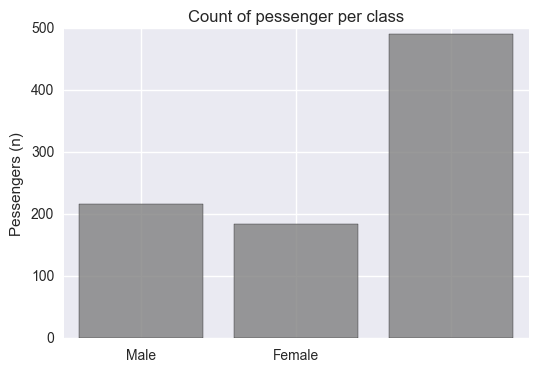

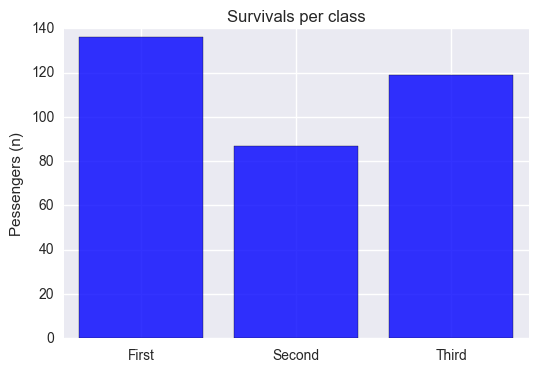

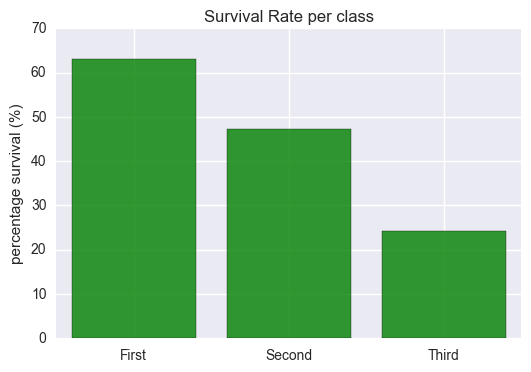

In [38]:
#Let's see the survival counts and percentages per class
# overall count
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=titanic_data.groupby('Pclass',as_index=False).count()['Survived']
plt.bar(xval-0.4, yval, alpha=0.8, color='grey')
plt.xticks(xval, lables)
plt.title("Count of pessenger per class")
plt.ylabel("Pessengers (n)")
plt.show()

# survival counts
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=titanic_data.groupby('Pclass',as_index=False).sum()['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='blue')
plt.xticks(xval, lables)
plt.title("Survivals per class")
plt.ylabel("Pessengers (n)")
plt.show()

# by survival percentage
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=100*titanic_data.groupby('Pclass',as_index=False).sum()['Survived']/titanic_data.groupby('Pclass',as_index=False).count()['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("Survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()


It is said due to location of third class pessengers it was difficult from them to reach the boats, that's why less survival.. however for second class survival percentages to be lower than second this leaves a question mark here.. it seems pessenger class indeed affected survival percentage .. now let's have a look at the last chart for women and men separately

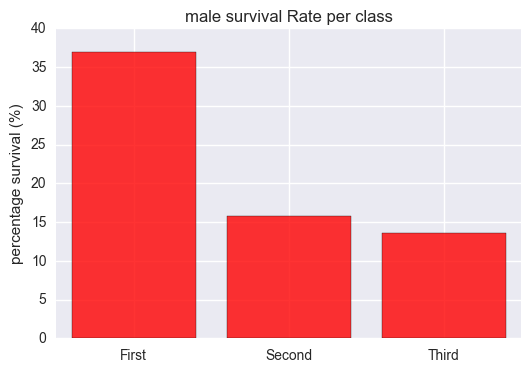

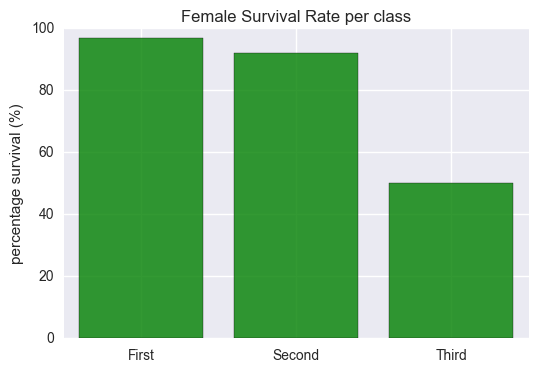

In [39]:
titanic_by_class_gender_sum=titanic_data.groupby(['Pclass','Sex_numeric'],as_index=False).sum()
titanic_by_class_gender_count=titanic_data.groupby(['Pclass','Sex_numeric'],as_index=False).count()

#male survival rate by class
xval=titanic_by_class_gender_count[titanic_by_class_gender_count['Sex_numeric']==0]['Pclass']
yval=100*titanic_by_class_gender_sum[titanic_by_class_gender_sum['Sex_numeric']==0]['Survived']\
/titanic_by_class_gender_count[titanic_by_class_gender_count['Sex_numeric']==0]['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='red')
plt.xticks(xval, lables)
plt.title("male survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()

#female survival rate by class
xval=titanic_by_class_gender_count[titanic_by_class_gender_count['Sex_numeric']==1]['Pclass']
yval=100*titanic_by_class_gender_sum[titanic_by_class_gender_sum['Sex_numeric']==1]['Survived']\
/titanic_by_class_gender_count[titanic_by_class_gender_count['Sex_numeric']==1]['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("Female Survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()


It seems class was a major factor in survivale, especially for men. First class males seem to be given higher (more than double) the chance to survive relative to both second and third class.

on the other hand, it seems for women that first and second plass pessengers were given similar chance.. while third class females were not. this might be due to the fact mentioned earlier regarding location of third class cabins.


The final question is: were first class male pessengers given higher chance to survive relative to women and children of third class?

For this we will need to identify women and children category. We will create column **isWomanOrChild** which is a boolean giving true if sex = female or Age below the age of 12. Why 12? because In 1901, the permissible child labour age was raised to 12 [source: wikipedia](https://en.wikipedia.org/wiki/History_of_childhood#Children.27s_rights_under_the_law), so I thik this is how the soceiety considered childhood age by this time, and I would **assume** the crew considered any male below 12 years to be a child.

Let's add this column and plot some more charts

In [40]:
titanic_data_full_Age['isWomanOrChild']=(titanic_data_full_Age['Sex_numeric']==1)|(titanic_data_full_Age['Age']<=12)
import warnings
warnings.filterwarnings('ignore')

C:\Users\AbouZeid\Anaconda3\envs\DAND\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
titanic_data_full_Age.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Id,Sex_numeric,isWomanOrChild
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,True


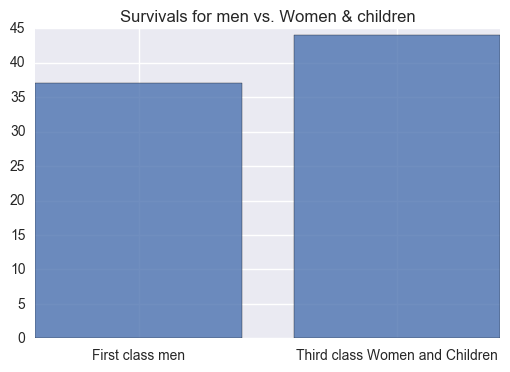

In [42]:
#bar plots for women and children of third class vs men of first class
titanicAge_by_category_class_sum=titanic_data_full_Age.groupby(['isWomanOrChild','Pclass'], as_index=False).sum()
titanicAge_by_category_class_count=titanic_data_full_Age.groupby(['isWomanOrChild','Pclass'], as_index=False).count()

third_class_women_children_survival_rate=(100*titanicAge_by_category_class_sum.iloc[5,2]\
                                          /titanicAge_by_category_class_count.iloc[5,2])

first_class_men_survival_rate=(100*titanicAge_by_category_class_sum.iloc[0,2]\
                                          /titanicAge_by_category_class_count.iloc[0,2])
xval=np.array([0,1])
yval=np.array([first_class_men_survival_rate,third_class_women_children_survival_rate])
lables=["First class men","Third class Women and Children"]
plt.bar(xval-0.4, yval, alpha=0.8)
plt.xticks(xval, lables)
plt.title("Survivals for men vs. Women & children")
plt.show()

It seems indeed third class women and children were given slightly higher chance of survival compared to first class men. it is however not that different! if we compare it with survival rate for women and chidlren in general the ratio is quite low.

we will run some statistical test in later section to understand if this difference is statistically significant or not.

now as a last step let's see if the fare had any impact on survival rate.. we will use overlapped histograms as well:

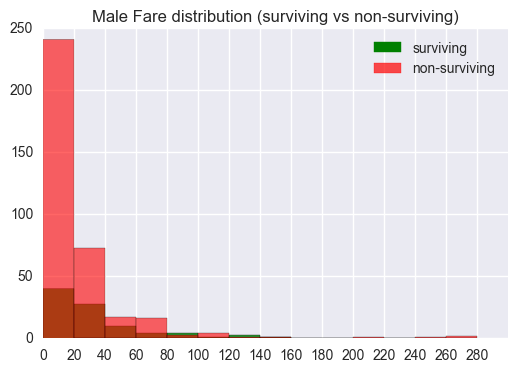

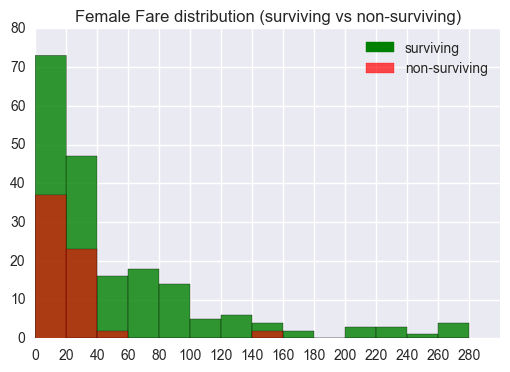

In [43]:
# Survival vs fare
# Let's represent it by Histogram for males and females separately.. we will start by males
# let's also normalize it by the count of males for each bins
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color='green'),Rectangle((0,0),1,1,color='red', alpha=0.7)]
legend_labels=['surviving','non-surviving']
bin_values = [n*20 for n in range(15)]

#male distribution
surviving_males_Fare=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==0) & (titanic_data_full_Age['Survived']==1)]['Fare']
non_surviving_males_Fare=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==0) & (titanic_data_full_Age['Survived']==0)]['Fare']
plt.hist(surviving_males_Fare, alpha=0.8,color='green',bins=bin_values)
plt.hist(non_surviving_males_Fare, alpha=0.6, color='red',bins=bin_values)
plt.xticks(bin_values)
plt.title("Male Fare distribution (surviving vs non-surviving)")
plt.legend(handles, legend_labels,loc='upper right')
plt.show()

#female distribution
surviving_female_Fare=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==1) & (titanic_data_full_Age['Survived']==1)]['Fare']
non_surviving_female_Fare=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==1) &(titanic_data_full_Age['Survived']==0)]['Fare']
plt.hist(surviving_female_Fare, alpha=0.8,color='green',bins=bin_values)
plt.hist(non_surviving_female_Fare, alpha=0.6, color='red',bins=bin_values)
plt.xticks(bin_values)
plt.legend(handles, legend_labels,loc='upper right')
plt.title("Female Fare distribution (surviving vs non-surviving)")
plt.show()

the ditribution looks to be almost the same for surving and non surviving pessengers, there doesn't seem to be quite a relation between survival and fare. we will later also use hypothesis testing to ensure the results.

### Hypothesis testing

- Were women and children more likely to survive the titanic? --> Chi-squared for independence of variables (since all categorical)
- Was cabin class a factor in survival? for men and women? --> Chi-squared for independence of variables (since all categorical)
- were first class men given higher chance of survival compared to 3rd class women and children? --> Chi-squared for independence of variables (since all categorical)
- we can also check if fair has any correlation with chance of survival, despite it is not so likely --> we can use two independent sample t-test 

In [52]:
#create a function for Chi-squared testing for independence of variables
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html
#https://newton.cx/~peter/2014/05/scipy-stats-cheat-sheet/
import scipy.stats as stats

titanic_age_by_category_survival_count=titanic_data_full_Age.groupby(['Survived','isWomanOrChild'],as_index=False).count()
survival_pivot=titanic_age_by_category_survival_count.pivot(index='Survived',columns='isWomanOrChild', values='Name')
row_sum=survival_pivot.sum()
col_sum=survival_pivot[True]+survival_pivot[False]

expected_value=[]
expected_value_df=pd.DataFrame([])
for row_val in row_sum:
    expected_value=[]
    for col_val in col_sum:
        expected_value.append(float(row_val)*col_val/row_sum.sum())
    expected_value_df[row_val]=expected_value

expected_value_df.columns=survival_pivot.columns
expected_value_df.index=survival_pivot.index

print survival_pivot
print expected_value_df
chisquare_matrix=((survival_pivot-expected_value_df)**2)/expected_value_df
chisquare=chisquare_matrix.values.sum()

# the following lines will do the hypothesis testing for alpha=0.05

chi_crit=stats.chi2.ppf(q=0.05, df=1)
p_value = (1-stats.chi2.cdf(x=chisquare, df=1))
print chisquare
print chi_crit
print p_value

isWomanOrChild  False  True 
Survived                    
0                 344     80
1                  72    218
isWomanOrChild       False       True 
Survived                              
0               247.036415  176.963585
1               168.963585  121.036415
224.511462164
0.00393214000002
0.0
